In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
import json

In [2]:
colors={"DELTA":"blue","LAME":"red","TENT":"purple","NOT_ADAPTED":"lightgreen","SAR":"black","SAR_TENT":"pink"}
def read_json_to_pd(output_json_file):
    with open(output_json_file,"r") as json_file:
        exps=json.load(json_file)
    data = []
    for entry in exps:
        row={}
        for k,v in entry["parameters"].items():
            row[k]=v
        row.update(entry['results'])
        data.append(row)
    df = pd.DataFrame(data)
    return df

methods=["DELTA","TENT","NOT_ADAPTED","SAR"] #"LAME"
def aggregate_batches(df,number_of_iterations):
    average_results=pd.DataFrame(df)
    for method in methods:
        average_results[f"{method}_cumulative_accuracy"]=list(average_results[[f"{method}_cumulative_accuracy_{i}" for i in range(0,number_of_iterations)]].values)
        average_results[f"{method}_batch_accuracy"]=list(average_results[[f"{method}_batch_accuracy_{i}" for i in range(0,number_of_iterations)]].values)
        average_results[f"{method}_class_accuracy"]=list(average_results[[f"{method}_class_accuracy_{i}" for i in range(0,number_of_iterations)]].values)
    return average_results

In [4]:
folder_to_analyze="TTA_on_corrupted/02_training_native/modelep7_adam_out_of_func/"
dfs=[]
for filename in os.listdir(folder_to_analyze):
    if filename.endswith("json"):
        df =read_json_to_pd(folder_to_analyze+filename)
        dfs.append(df)
all_res=pd.concat(dfs)
all_res_aggregated=aggregate_batches(all_res.groupby(["artifact","model"]).mean(),10).reset_index(1)


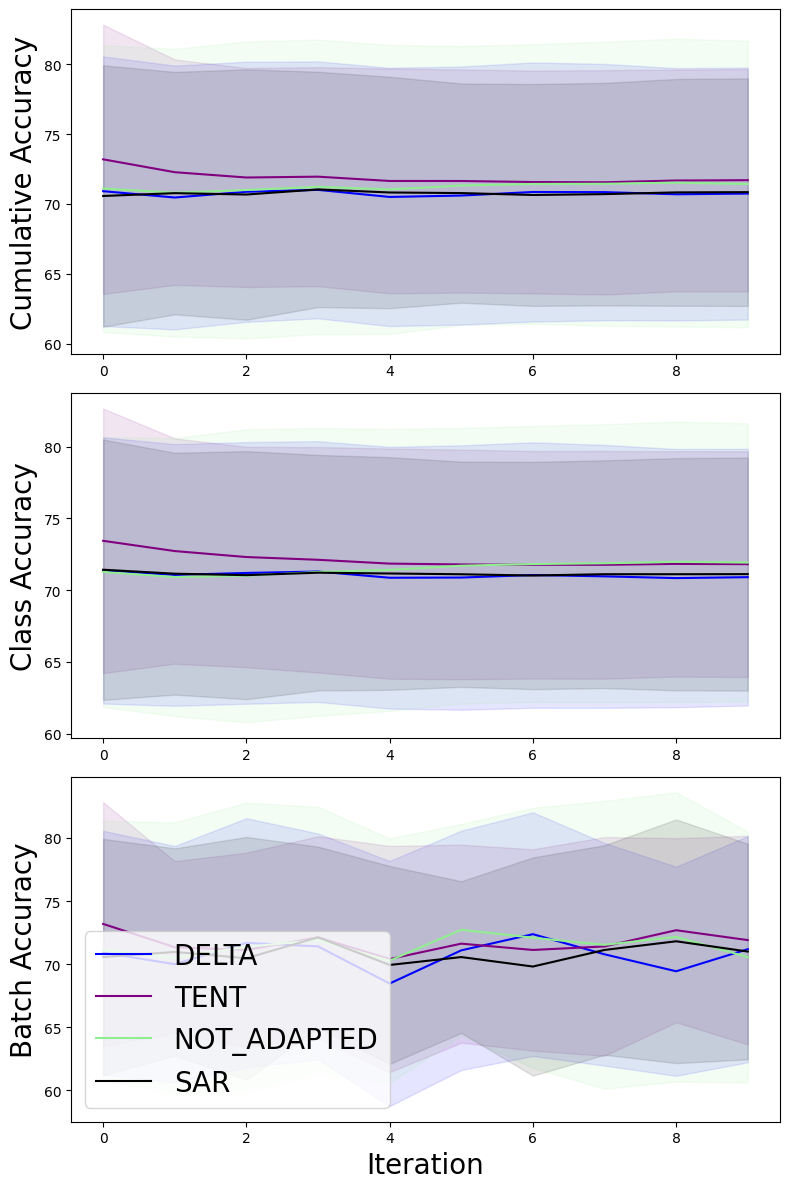

In [5]:
fig,axes=plt.subplots(3,1,figsize=(8,12))
for i,metric in enumerate(["cumulative","class","batch"]):
    for method in methods:
        
        avg_p=all_res_aggregated[f"{method}_{metric}_accuracy"].values.mean()
        std_p=all_res_aggregated[f"{method}_{metric}_accuracy"].values.std()
        axes[i].plot(avg_p,color=colors[method],label=method)
        axes[i].fill_between(list(range(10)),avg_p-std_p,avg_p+std_p,alpha=0.1,color=colors[method])
        axes[i].set_ylabel(metric.title()+" Accuracy",fontsize=20)
        
axes[i].set_xlabel("Iteration",fontsize=20)
plt.legend(fontsize=20,loc="lower left")
plt.tight_layout()
# plt.savefig("model1_all.png",dpi=300)

In [5]:
folder_to_analyze="TTA_on_corrupted/02_training_native/modelep7/"
dfs=[]
for filename in os.listdir(folder_to_analyze):
    if filename.endswith("json"):
        df =read_json_to_pd(folder_to_analyze+filename)
        dfs.append(df)
all_res=pd.concat(dfs)
all_res_aggregated=aggregate_batches(all_res.groupby(["artifact","model"]).mean(),10).reset_index(1)


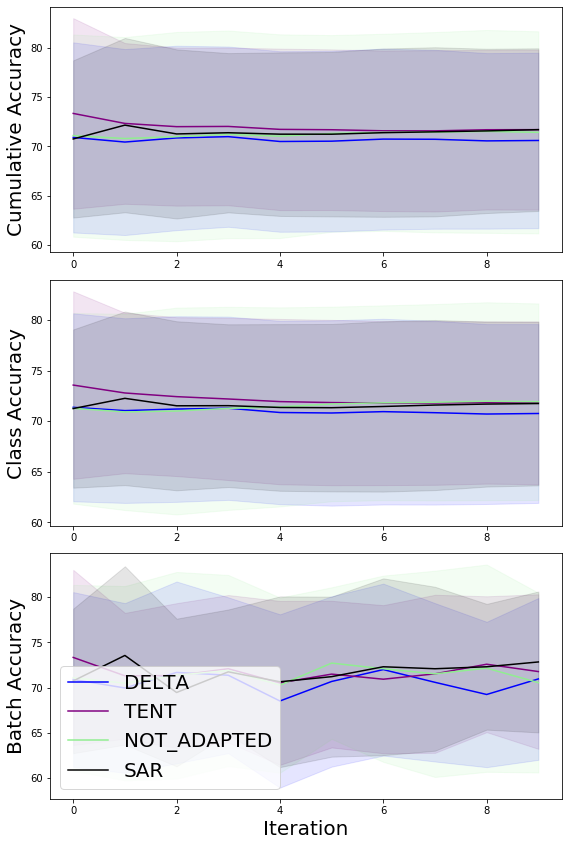

In [6]:
fig,axes=plt.subplots(3,1,figsize=(8,12))
for i,metric in enumerate(["cumulative","class","batch"]):
    for method in methods:
        
        avg_p=all_res_aggregated[f"{method}_{metric}_accuracy"].values.mean()
        std_p=all_res_aggregated[f"{method}_{metric}_accuracy"].values.std()
        axes[i].plot(avg_p,color=colors[method],label=method)
        axes[i].fill_between(list(range(10)),avg_p-std_p,avg_p+std_p,alpha=0.1,color=colors[method])
        axes[i].set_ylabel(metric.title()+" Accuracy",fontsize=20)
        
axes[i].set_xlabel("Iteration",fontsize=20)
plt.legend(fontsize=20,loc="lower left")
plt.tight_layout()
# plt.savefig("model1_all.png",dpi=300)

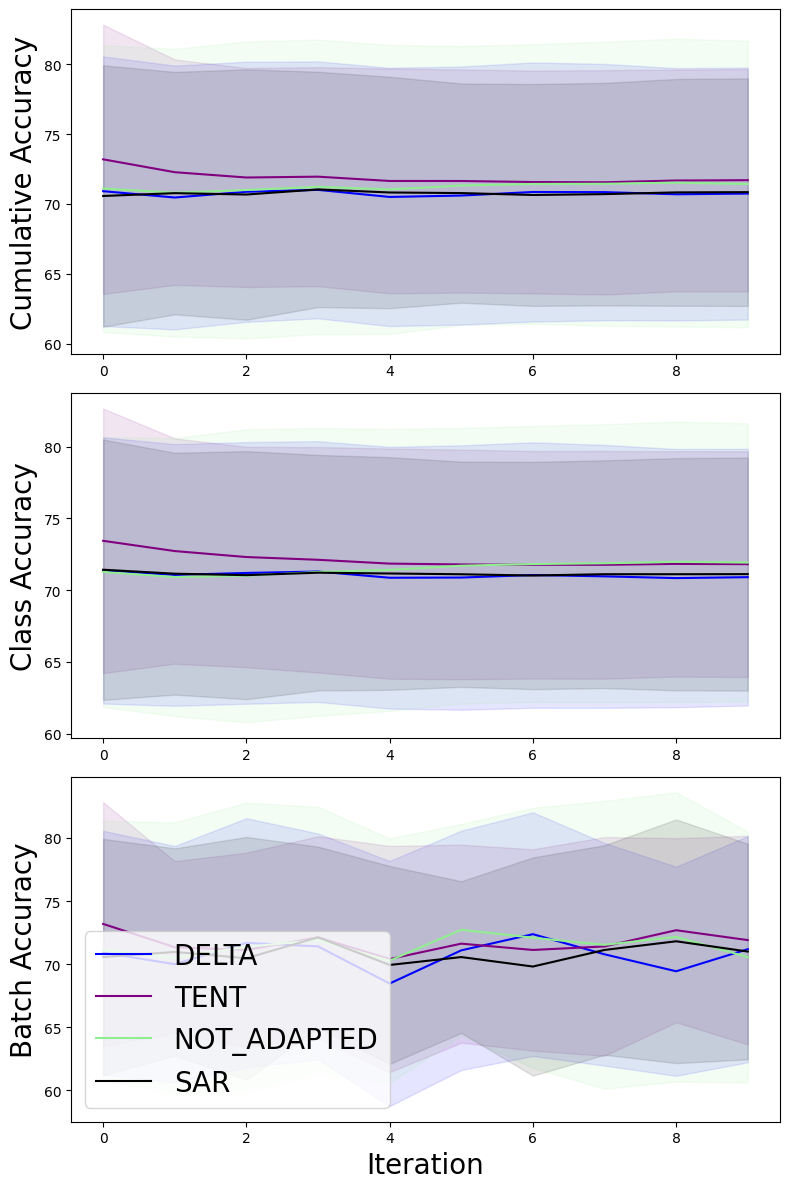

In [6]:
fig,axes=plt.subplots(3,1,figsize=(8,12))
for i,metric in enumerate(["cumulative","class","batch"]):
    for method in methods:
        
        avg_p=all_res_aggregated[f"{method}_{metric}_accuracy"].values.mean()
        std_p=all_res_aggregated[f"{method}_{metric}_accuracy"].values.std()
        axes[i].plot(avg_p,color=colors[method],label=method)
        axes[i].fill_between(list(range(10)),avg_p-std_p,avg_p+std_p,alpha=0.1,color=colors[method])
        axes[i].set_ylabel(metric.title()+" Accuracy",fontsize=20)
        
axes[i].set_xlabel("Iteration",fontsize=20)
plt.legend(fontsize=20,loc="lower left")
plt.tight_layout()
# plt.savefig("model1_all.png",dpi=300)

In [7]:
artifacts=["00_original", "01_focus", "02_jpeg", "04_rotation", "05_flip" ,"08_bright", "09_contrast", "10_dark_spots", "12_squamous","13_fat"]

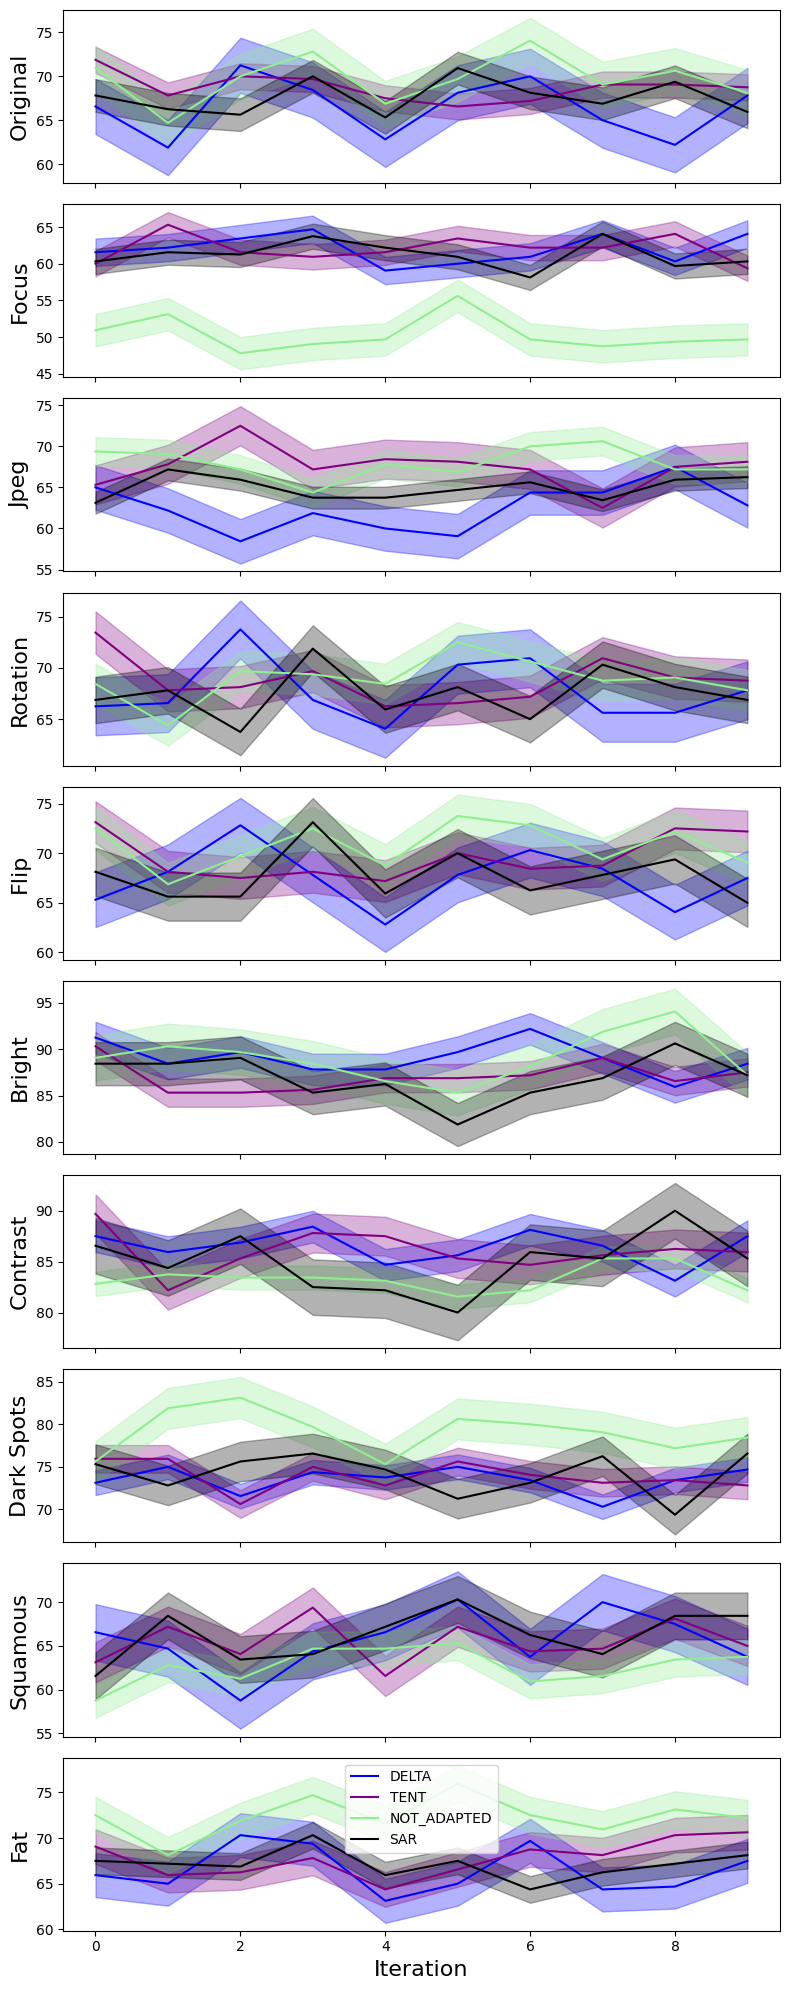

In [8]:
fig,axes=plt.subplots(len(artifacts),1,figsize=(8,20),sharex=True)
for i, artifact in enumerate(artifacts):
#     for i,metric in enumerate(["cumulative","class","batch"]):
    metric="batch"
    for method in methods:
        avg_p=all_res_aggregated[f"{method}_{metric}_accuracy"][artifact]
        std_p=all_res_aggregated[f"{method}_{metric}_accuracy"][artifact].std()
        axes[i].plot(avg_p,color=colors[method],label=method)
        axes[i].fill_between(list(range(10)),avg_p-std_p,avg_p+std_p,alpha=0.3,color=colors[method])
        axes[i].set_ylabel(artifact[3:].replace("_"," ").title(),fontsize=16)
        
axes[i].set_xlabel("Iteration",fontsize=16)
plt.legend()
plt.tight_layout()
# plt.savefig("model1_batch_accuracies.png",dpi=300)

In [39]:
df=read_json_to_pd("results_testsar_TTA_01_focus_TvN_350_SN_D256_v2_Ep1_fullmodel.pth.json").drop(columns=["seed","artifact"])

In [42]:
methods=["TENT","SAR","SAR_TENT"]

In [45]:
ag=aggregate_batches(df,10)

In [48]:
avg_p

0    [67.1875, 65.625, 61.979166666666664, 62.89062...
1    [68.75, 71.875, 68.75, 67.96875, 66.875, 65.88...
Name: TENT_cumulative_accuracy, dtype: object

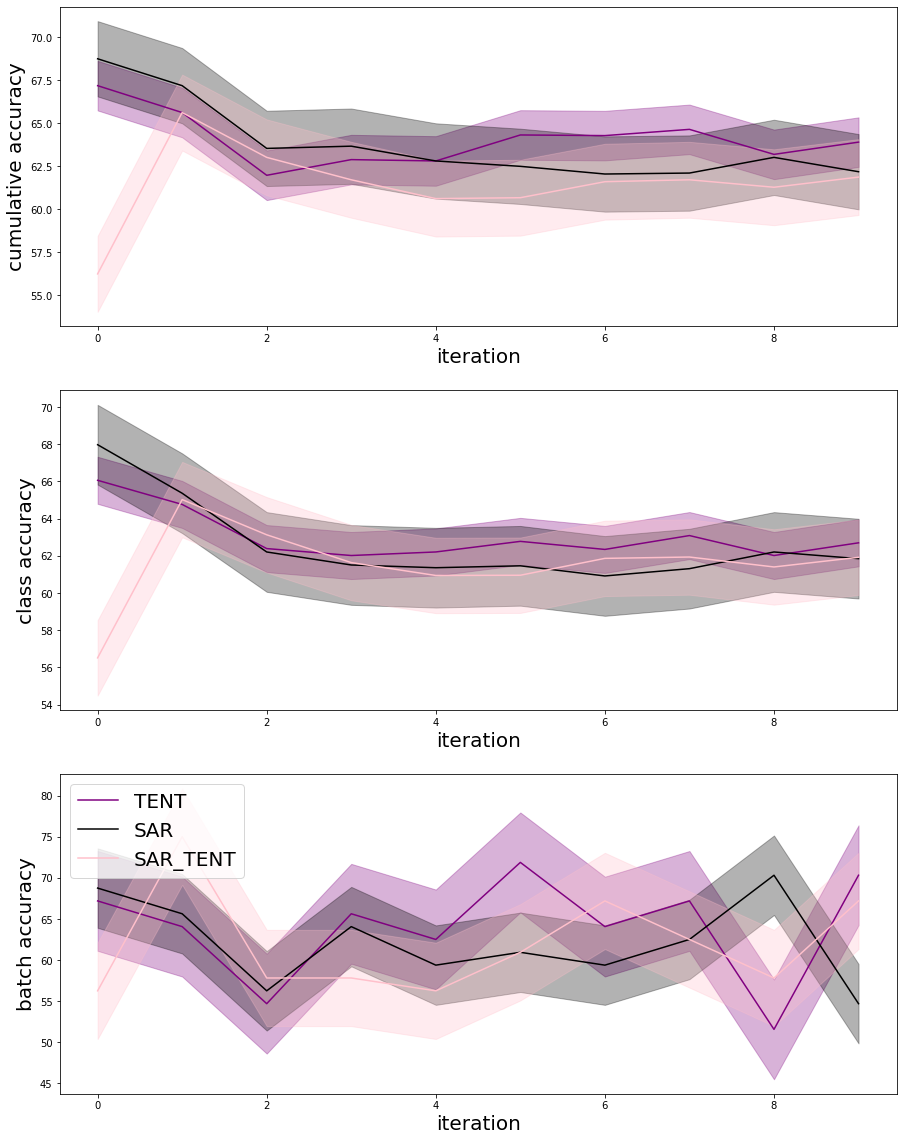

In [54]:
fig,axes=plt.subplots(3,1,figsize=(15,20))
for i,metric in enumerate(["cumulative","class","batch"]):
    for method in methods:
        avg_p=ag[f"{method}_{metric}_accuracy"][0]
        std_p=ag[f"{method}_{metric}_accuracy"][0].std()
        axes[i].plot(avg_p,color=colors[method],label=method)
        axes[i].fill_between(list(range(10)),avg_p-std_p,avg_p+std_p,alpha=0.3,color=colors[method])
        axes[i].set_ylabel(metric+" accuracy",fontsize=20)
        
    axes[i].set_xlabel("iteration",fontsize=20)
plt.legend(fontsize=20)
# plt.savefig("model2.png",dpi=300)

# debugging

In [4]:
adam_df =read_json_to_pd("TTA_on_corrupted/02_training_native/adam_out_of_func/"+"results_TTA_01_focus_TvN_350_SN_D256_Initial_Ep7_fullmodel.json")
old_df =read_json_to_pd("TTA_on_corrupted/02_training_native/modelep7/"+"results_TTA_01_focus_TvN_350_SN_D256_Initial_Ep7_fullmodel.json")
sgd_df =read_json_to_pd("TTA_on_corrupted/02_training_native/sgd_out_of_func/"+"results_TTA_01_focus_TvN_350_SN_D256_Initial_Ep7_fullmodel.json")
sgd_in_func_df =read_json_to_pd("TTA_on_corrupted/02_training_native/"+"results_TTA_01_focus_TvN_350_SN_D256_Initial_Ep7_fullmodel.json")

In [6]:
int_sgd=sgd_df.drop(columns=["seed","artifact","model"])
inf_insgd=sgd_in_func_df.drop(columns=["seed","artifact","model"])
for column in inf_insgd.columns:
    print((int_sgd-old_df)[column])

0    0.0
1    0.0
2    0.0
3    0.0
4    0.0
Name: TENT_cumulative_accuracy_0, dtype: float64
0    0.0
1    0.0
2    0.0
3    0.0
4    0.0
Name: TENT_batch_accuracy_0, dtype: float64
0    0.0
1    0.0
2    0.0
3    0.0
4    0.0
Name: TENT_class_accuracy_0, dtype: float64
0    0.0
1    0.0
2    0.0
3    0.0
4    0.0
Name: TENT_cumulative_accuracy_1, dtype: float64
0    0.0
1    0.0
2    0.0
3    0.0
4    0.0
Name: TENT_batch_accuracy_1, dtype: float64
0    0.0
1    0.0
2    0.0
3    0.0
4    0.0
Name: TENT_class_accuracy_1, dtype: float64
0    0.0
1    0.0
2    0.0
3    0.0
4    0.0
Name: TENT_cumulative_accuracy_2, dtype: float64
0    0.0
1    0.0
2    0.0
3    0.0
4    0.0
Name: TENT_batch_accuracy_2, dtype: float64
0    0.0
1    0.0
2    0.0
3    0.0
4    0.0
Name: TENT_class_accuracy_2, dtype: float64
0    0.0
1    0.0
2    0.0
3    0.0
4    0.0
Name: TENT_cumulative_accuracy_3, dtype: float64
0    0.0
1    0.0
2    0.0
3    0.0
4    0.0
Name: TENT_batch_accuracy_3, dtype: float64
0

In [7]:
sgd_df_agg=aggregate_batches(sgd_df.groupby(["artifact","model"]).mean(),10).reset_index(1)
old_df_agg=aggregate_batches(old_df.groupby(["artifact","model"]).mean(),10).reset_index(1)
adam_df_agg=aggregate_batches(adam_df.groupby(["artifact","model"]).mean(),10).reset_index(1)
sgd_in_func_df_agg=aggregate_batches(sgd_in_func_df.groupby(["artifact","model"]).mean(),10).reset_index(1)

[]

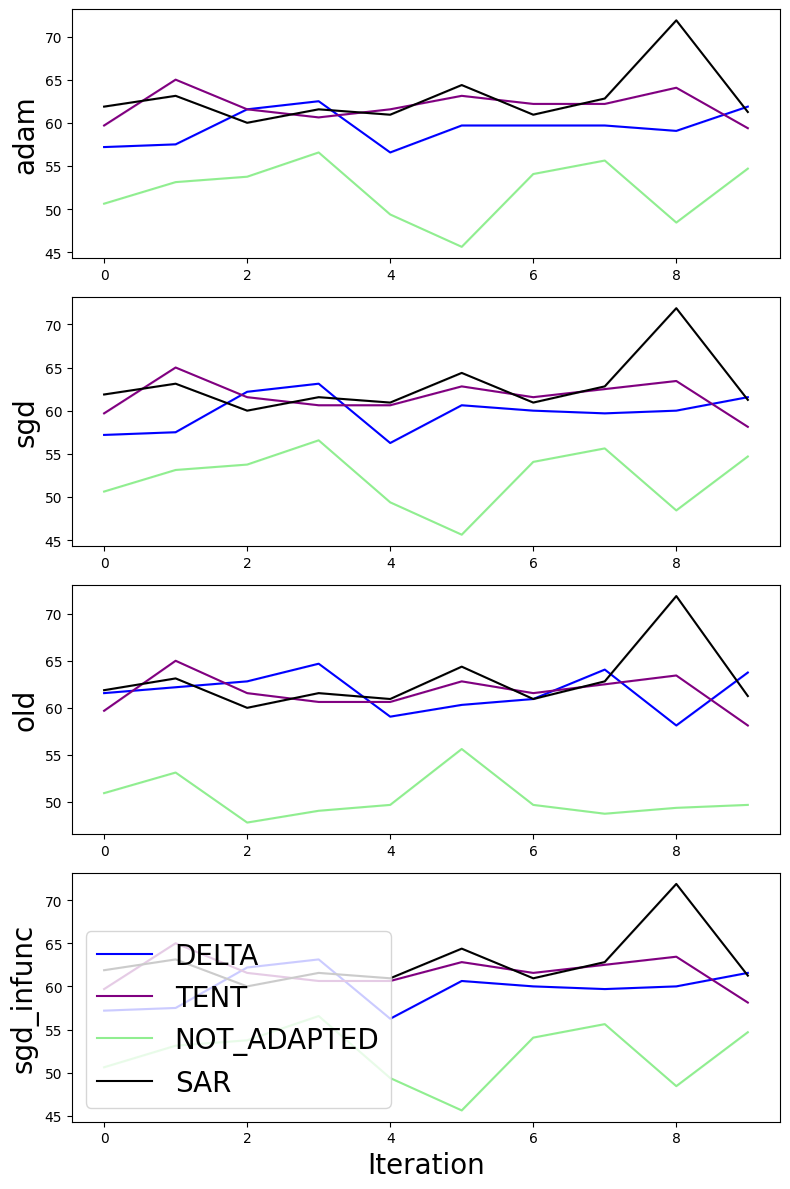

In [9]:
fig,axes=plt.subplots(4,1,figsize=(8,12))
names=["adam","sgd","old","sgd_infunc"]
for i,all_res_aggregated in enumerate([adam_df_agg,sgd_df_agg,old_df_agg,sgd_in_func_df_agg]):
    metric="batch"
    for method in methods:
        avg_p=all_res_aggregated[f"{method}_{metric}_accuracy"].values.mean()
        std_p=all_res_aggregated[f"{method}_{metric}_accuracy"].values.std()
        axes[i].plot(avg_p,color=colors[method],label=method)
        axes[i].fill_between(list(range(10)),avg_p-std_p,avg_p+std_p,alpha=0.1,color=colors[method])
        axes[i].set_ylabel(names[i],fontsize=20)
        
axes[i].set_xlabel("Iteration",fontsize=20)
plt.legend(fontsize=20,loc="lower left")
plt.tight_layout()
plt.plot()
# plt.savefig("model1_all.png",dpi=300)